In [43]:
!pip install jieba

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#分类：
neutral: 😐
happiness: 🥰
like: 😍
surprise: 😱
disgust: 😞
anger: 😠️
sadness: 😥
fear: 😨

In [44]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/drive/MyDrive/iss/NLP Project/SentimentAnalysis-master/data/Nlpcc2014Train.xlsx')

# Create a dictionary with content grouped by labels
content_by_label = {label: group["content"].tolist() for label, group in df.groupby('label')}

# Get content for each label
neutral = content_by_label.get('neutral', [])
happiness = content_by_label.get('happiness', [])
like = content_by_label.get('like', [])
surprise = content_by_label.get('surprise', [])
disgust = content_by_label.get('disgust', [])
anger = content_by_label.get('anger', [])
sadness = content_by_label.get('sadness', [])
fear = content_by_label.get('fear', [])

# Now you can convert the lists to numpy arrays and concatenate them if needed
import numpy as np

combined = np.concatenate([
    np.array(neutral),
    np.array(happiness),
    np.array(like),
    np.array(surprise),
    np.array(disgust),
    np.array(anger),
    np.array(sadness),
    np.array(fear)
])

print(combined.shape)

(48875,)


In [45]:
happiness

['哈哈哈哈哈哈哈哈！',
 '[耶]哈哈哈！',
 '三天满满当当的，除了晚上好像没事儿，谁在任丘啊，约我哇约我哇~~',
 '四、整个从屋顶设计到各个角落细节营造温暖舒适感觉尝试营',
 '欢迎你，2011，新年快乐！',
 '刚才听说一位小患者（和媛媛同岁的女孩）被撵到七楼去了，看着她妈妈幸福的样子心里真羡慕啊，到七楼普通病房说明已经大为好转不用在特护病房了，那个贾鑫小朋友明天也要出院了，都是历经生死的孩子，也都是和我们前后进仓的，他们一个出院一个下楼了，真的很期待属于我们的那一天！！',
 '总裁：我有副总裁！',
 '来四大碗米线！',
 '美么?',
 '昨天在百来公里外闭塞的乡下录音,跟一帮子巫师为伍.饭菜都很好吃,就是晚上8点过后买不到酒了.......',
 '接下来继续红红的红歌赛～',
 '要送给大家的20本毛边书心已经签完啦。',
 '（看完电影还有精彩节目可千万不要走开哦，[偷笑] 想要知道请接看下条微博。。。）',
 '淳迷们快快来[围观] ！～[耶]',
 '今天终于占到一个位子了，我有自己独立的位子了。',
 '谢大家的生日祝福...',
 '在这里一并道谢了...',
 '儿子的学习桌，每天晚上都成了我玩魔兽的笔记本电脑桌了，哈哈，一会儿照个照片发来，拿手机拍吧，虽然效果很烂，但是发的方便。',
 '哈哈没夸你，我这人就是实在人说实在话…',
 '//@星库刘海洋:回复@王艺禅V:看你把我夸的，心里热乎乎的。',
 '//@王艺禅V:转发此微博:哈哈！',
 '做梦都梦到老板在帮我改proposal...然后瞬间在梦里反应过来我靠下午了答应客户上午打的电话没打，明就走了来不及了怎么办怎么办，然后瞬间醒过来，很高兴的发现天还没亮，于是默念一百遍记得早上到公司就给客户电话电话电话然后踏实的再次睡着了。。。',
 '大家边品茶喝咖啡，边听诗歌朗诵，欢迎来坐坐！',
 '回复@阳光靓女:多谢博友的关注，熙道一定不会辜负大家的期望[太阳] //@阳光靓女:[太阳] 熙道老师的重任在肩，不负重望，童鞋们预祝老师圆满完成拍摄任务！',
 '加油！[闪闪红]',
 '如果可以经常休息该多好·如果可以天天出去玩 多好··如果 有那么多的如果 我该多幸福··？',
 '[哈哈] 好开心的一天 奥特曼········[心]',
 '首次遭遇被清场[吃惊]

#### 八分类转化

In [46]:
# Assign a unique number to each category
# If you have string labels, you can map them to integers using a dictionary
labels_to_int = {
    'neutral': 0,
    'happiness': 1,
    'like': 2,
    'surprise': 3,
    'disgust': 4,
    'anger': 5,
    'sadness': 6,
    'fear': 7
}

# Convert the labels to a list of integers based on the mapping
y = np.concatenate([
    labels_to_int['neutral']*np.ones(len(neutral), dtype=int),
    labels_to_int['happiness']*np.ones(len(happiness), dtype=int),
    labels_to_int['like']*np.ones(len(like), dtype=int),
    labels_to_int['surprise']*np.ones(len(surprise), dtype=int),
    labels_to_int['disgust']*np.ones(len(disgust), dtype=int),
    labels_to_int['anger']*np.ones(len(anger), dtype=int),
    labels_to_int['sadness']*np.ones(len(sadness), dtype=int),
    labels_to_int['fear']*np.ones(len(fear), dtype=int)
])

print(y.shape)


(48875,)


In [47]:
import jieba

# 从文件加载停用词
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = set([line.strip() for line in file if line.strip()])
    return stopwords

# 停用词文件路径
stopwords_file = '/content/drive/MyDrive/iss/NLP Project/SentimentAnalysis-master/stopWords/stopwords.txt'  # 修改为你的文件路径
stopwords = load_stopwords(stopwords_file)

# 对句子进行分词，并去掉换行符和停用词
def tokenizer(text):
    ''' Simple Parser converting each document to lower-case, then
        removing the breaks for new lines and finally splitting on the
        whitespace while removing stopwords.
    '''
    result = []
    for document in text:
        words = jieba.lcut(document.replace('\n', ''))  # 分词
        filtered_words = [word for word in words if word not in stopwords]  # 去除停用词
        result.append(filtered_words)
    return result

# 假设combined是你需要处理的文本列表
combined = tokenizer(combined)
print(combined)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [48]:
combined

[['回复',
  '王羊羊',
  '微博',
  '安静',
  '生存环境',
  '北京',
  '五环',
  '分钟',
  '车程',
  '938',
  '住处',
  '300',
  '米',
  '饮食',
  '一条街',
  '更是',
  '北京',
  '饮食',
  '街',
  '翻版',
  '应有尽有'],
 ['王羊羊', '微博', '廊坊', '地方', '紧邻', '京津', '闹中取静'],
 ['录入'],
 ['一部', 'les', '噶', '情感', '面临', '噶', '困难', '噶', '一出', '粤语', '电影'],
 ['QQ',
  '培训班',
  '群早',
  '盘',
  '操作',
  '提示',
  '上周',
  '再收',
  '十字星',
  '市场',
  '下跌',
  '中继',
  '初步',
  '见底'],
 ['本周', '将会'],
 ['股指',
  '下破',
  ' ',
  '周线',
  '支撑',
  '三周',
  '周线',
  '本周',
  ' ',
  '周线',
  '死叉',
  '显示',
  '中期',
  '调整',
  '之中',
  '市场',
  '重心',
  '下移',
  '趋势',
  '难以',
  '改变'],
 ['摄影', '之友', '做', 'ipad', 'App', '已有', '万', '订阅', '量'],
 ['招聘', '代写', '毕业论文', ' '],
 ['论文', '大纲', '已拟'],
 ['参考', '资料齐全'],
 ['字数', '一万'],
 ['玩', '屎'],
 ['车牌', '不愧', '买回来'],
 [],
 ['号', '值班', '号', '号', '休假', '号', '号', '号', '三天', '任丘', '培训'],
 ['回刷', '2.3', 'Rom', '黑', '锁屏', '状态', '屏幕', '微微', '亮'],
 ['发烫', '耗电'],
 ['这家', '饭店', '改版', '第一次'],
 ['环境',
  '宽松',
  '开放',
  '感觉',
  '点饭',
  '开放',
  '增加',
  '套餐',


In [ ]:
from gensim.models.word2vec import Word2Vec
from gensim.corpora.dictionary import Dictionary
from keras.preprocessing import sequence
import multiprocessing

cpu_count = multiprocessing.cpu_count() # 4
vocab_dim = 100
n_iterations = 10  # ideally more..   epoch
n_exposures = 10 # 所有频数超过10的词语
window_size = 7
n_epoch = 15
input_length = 100
maxlen = 100

def create_dictionaries(model=None, combined=None):
    if (combined is not None) and (model is not None):
        gensim_dict = Dictionary()
        # 使用 model.wv.key_to_index 替代 model.vocab.keys()
        gensim_dict.doc2bow(model.wv.key_to_index.keys(),
                            allow_update=True)
        # 由于 model.wv.key_to_index 已经是 {word: index} 的映射，所以可以直接使用
        w2indx = {word: index + 1 for word, index in model.wv.key_to_index.items()}  # 词语的索引
        w2vec = {word: model.wv[word] for word in w2indx.keys()}  # 词语的词向量

        def parse_dataset(combined):  # 闭包-->临时使用
            data = []
            for sentence in combined:
                new_txt = []
                for word in sentence:
                    try:
                        new_txt.append(w2indx[word])
                    except:
                        new_txt.append(0)  # 词频小于10的词语索引为0
                data.append(new_txt)
            return data  # word => index

        combined = parse_dataset(combined)
        combined = sequence.pad_sequences(combined, maxlen=maxlen)  # 对句子进行填充
        return w2indx, w2vec, combined
    else:
        print('No data provided...')


#创建词语字典，并返回每个词语的索引，词向量，以及每个句子所对应的词语索引
def word2vec_train(combined):

    model = Word2Vec(vector_size=vocab_dim,
                     min_count=n_exposures,
                     window=window_size,
                     workers=cpu_count,
                     epochs=n_iterations)
    model.build_vocab(combined) # input: list
    #model.train(combined)
    model.train(combined, total_examples=model.corpus_count, epochs=model.epochs)
    model.save('/content/drive/MyDrive/iss/NLP Project/SentimentAnalysis-master/model/Word2vec_model.pkl')
    index_dict, word_vectors,combined = create_dictionaries(model=model,combined=combined)
    return   index_dict, word_vectors,combined

print ('Training a Word2vec model...')
index_dict, word_vectors,combined=word2vec_train(combined)

Training a Word2vec model...


Exception in thread Thread-72 (_worker_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-73 (_worker_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/gensim/models/word2vec.py", line 1166, in _worker_loop
    tally, raw_tally = self._do_train_job(data_iterable, alpha, thread_private_mem)
  File "/usr/local/lib/python3.10/dist-packages/gensim/models/word2vec.py", line 957, in _do_train_job
    tally += train_batch_cbow(self, sentences, alpha, work, neu1, self.compute_loss)
  File "gensim/models/word2vec_inner.pyx", line 638, in gensim.models.word2vec_inner.train_batch_cbow
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any()

In [11]:
from sklearn.model_selection import train_test_split  # 更新导入路径
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Activation  # 更新了导入的层
from keras.models import model_from_yaml
import numpy as np
import sys
sys.setrecursionlimit(1000000)
import yaml
import keras

batch_size = 32


def get_data(index_dict,word_vectors,combined,y):

    n_symbols = len(index_dict) + 1  # 所有单词的索引数，频数小于10的词语索引为0，所以加1
    embedding_weights = np.zeros((n_symbols, vocab_dim)) # 初始化 索引为0的词语，词向量全为0
    for word, index in index_dict.items(): # 从索引为1的词语开始，对每个词语对应其词向量
        embedding_weights[index, :] = word_vectors[word]
    x_train, x_test, y_train, y_test = train_test_split(combined, y, test_size=0.2)
    y_train = keras.utils.to_categorical(y_train,num_classes=8)
    y_test = keras.utils.to_categorical(y_test,num_classes=8)
    # print x_train.shape,y_train.shape
    return n_symbols,embedding_weights,x_train,y_train,x_test,y_test


##定义网络结构
def train_lstm(n_symbols, embedding_weights, x_train, y_train, x_test, y_test):
    print('Defining a Simple Keras Model...')
    model = Sequential()
    model.add(Embedding(output_dim=vocab_dim,
                        input_dim=n_symbols,
                        mask_zero=True,
                        weights=[embedding_weights],
                        input_length=input_length))
    model.add(LSTM(units=50, activation='tanh', recurrent_activation='hard_sigmoid'))  # 更新参数名
    model.add(Dropout(0.5))
    model.add(Dense(units=8, activation='softmax'))  # 明确指定 units 参数
    # Activation 层在这里可能是多余的，因为上一层 Dense 已经使用了 'softmax' 激活函数

    print('Compiling the Model...')
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

    print("Train...")
    model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, verbose=1)

    print("Evaluate...")
    score = model.evaluate(x_test, y_test, batch_size=batch_size)

    # 使用 model.to_json() 替换 model.to_yaml()
    json_string = model.to_json()
    with open('/content/drive/MyDrive/iss/NLP Project/SentimentAnalysis-master/model/lstm.json', 'w') as outfile:
        outfile.write(json_string)
    # 继续保存你的模型权重
    model.save_weights('/content/drive/MyDrive/iss/NLP Project/SentimentAnalysis-master/model/lstm.h5')
    print('Test score:', score)

print ('Setting up Arrays for Keras Embedding Layer...')
n_symbols,embedding_weights,x_train,y_train,x_test,y_test=get_data(index_dict, word_vectors,combined,y)
print ("x_train.shape and y_train.shape:")
print (x_train.shape,y_train.shape)
train_lstm(n_symbols,embedding_weights,x_train,y_train,x_test,y_test)

Setting up Arrays for Keras Embedding Layer...
x_train.shape and y_train.shape:
(39100, 100) (39100, 8)
Defining a Simple Keras Model...
Compiling the Model...
Train...
Epoch 1/7
1222/1222 [==============================] - 139s 111ms/step - loss: 1.2548 - accuracy: 0.6432
Epoch 2/7
1222/1222 [==============================] - 128s 105ms/step - loss: 1.0493 - accuracy: 0.6779
Epoch 3/7
1222/1222 [==============================] - 124s 101ms/step - loss: 0.9150 - accuracy: 0.7121
Epoch 4/7
1222/1222 [==============================] - 160s 131ms/step - loss: 0.8215 - accuracy: 0.7361
Epoch 5/7
1222/1222 [==============================] - 127s 104ms/step - loss: 0.7474 - accuracy: 0.7566
Epoch 6/7
1222/1222 [==============================] - 129s 106ms/step - loss: 0.6822 - accuracy: 0.7783
Epoch 7/7
1222/1222 [==============================] - 127s 104ms/step - loss: 0.6279 - accuracy: 0.7969
Evaluate...
306/306 [==============================] - 6s 18ms/step - loss: 1.2544 - accuracy: 0

In [12]:
"""
预测
"""
import jieba
import numpy as np
from gensim.models.word2vec import Word2Vec
from gensim.corpora.dictionary import Dictionary
from keras.preprocessing import sequence


from keras.models import model_from_json
np.random.seed(1337)  # For Reproducibility
import sys
sys.setrecursionlimit(1000000)

# define parameters
maxlen = 100

def create_dictionaries(model=None, combined=None):
    if (combined is not None) and (model is not None):
        gensim_dict = Dictionary()
        # 使用 model.wv.key_to_index 替代 model.vocab.keys()
        gensim_dict.doc2bow(model.wv.key_to_index.keys(),
                            allow_update=True)
        # 由于 model.wv.key_to_index 已经是 {word: index} 的映射，所以可以直接使用
        w2indx = {word: index + 1 for word, index in model.wv.key_to_index.items()}  # 词语的索引
        w2vec = {word: model.wv[word] for word in w2indx.keys()}  # 词语的词向量

        def parse_dataset(combined):  # 闭包-->临时使用
            data = []
            for sentence in combined:
                new_txt = []
                for word in sentence:
                    try:
                        new_txt.append(w2indx[word])
                    except:
                        new_txt.append(0)  # 词频小于10的词语索引为0
                data.append(new_txt)
            return data  # word => index
        combined = parse_dataset(combined)
        combined = sequence.pad_sequences(combined, maxlen=maxlen)  # 对句子进行填充
        return w2indx, w2vec, combined
    else:
        print('No data provided...')


def input_transform(string):
    words=jieba.lcut(string)
    words=np.array(words).reshape(1,-1)
    model=Word2Vec.load('/content/drive/MyDrive/iss/NLP Project/SentimentAnalysis-master/model/Word2vec_model.pkl')
    _,_,combined=create_dictionaries(model,words)
    return combined


def lstm_predict(string):
    print('loading model......')
    # ... load the model and the weights ...
    with open('/content/drive/MyDrive/iss/NLP Project/SentimentAnalysis-master/model/lstm.json', 'r') as f:
        json_string = f.read()
    model = model_from_json(json_string)

    print('loading weights......')
    model.load_weights('/content/drive/MyDrive/iss/NLP Project/SentimentAnalysis-master/model/lstm.h5')
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

    # Transform the input string
    data = input_transform(string)

    # Make a prediction
    result = model.predict(data)
    predicted_class_index = np.argmax(result, axis=1)  # Get the index of the highest probability class
    print(predicted_class_index)  # Output the predicted class index, e.g., [1]

    # Define your classes
    classes = {
        0: 'neutral',
        1: 'happiness',
        2: 'like',
        3: 'surprise',
        4: 'disgust',
        5: 'anger',
        6: 'sadness',
        7: 'fear'
    }

    # Predict and print the class
    predicted_class = classes.get(predicted_class_index[0], 'Unknown')
    #print(f'Predicted class for "{string}" is: {predicted_class}')
    return predicted_class

In [39]:
lstm_predict("我们啥时候一起去看电影吧")

loading model......
loading weights......
1/1 [==============================] - 1s 609ms/step
[0]


'neutral'

In [14]:
print(lstm_predict("你什么时候回来呀 我真的好想你 唉 好难过每天"))

loading model......
loading weights......
1/1 [==============================] - 0s 401ms/step
[6]
sadness


### 聊天记录处理 txt ---> Csv


In [ ]:
import pandas as pd
import re
from datetime import datetime

# 设置你的聊天记录文件路径
chat_file_path = '/path_to_your_chat.txt'
# 设置输出CSV文件的路径
output_csv_path = '/path_to_output.csv'

# 准备正则表达式以匹配日期时间和用户名（如果存在）
pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) (.*?)\n(.+?)(?=\n\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2} |$)', re.DOTALL)

# 读取文件并匹配每条消息
with open(chat_file_path, 'r', encoding='utf-8') as file:
    content = file.read()
    matches = pattern.findall(content)

# 解析匹配结果，创建一个列表，包含每条消息的字典
messages = []
for match in matches:
    datetime_str, user, message = match
    if user == "None":  # 如果用户是'None'，可能表示没有用户名
        user = None
    # 清理和处理消息内容
    message = message.strip().replace('\n', ' ')
    messages.append({
        'datetime': datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S'),
        'user': user,
        'message': message
    })

# 转换为 DataFrame
df = pd.DataFrame(messages)

# 将 DataFrame 保存为 CSV 文件
df.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f'Chat history saved to {output_csv_path}')


按月整理聊天记录

In [ ]:
import pandas as pd
from collections import defaultdict

# 读取CSV文件
df = pd.read_csv('/mnt/data/your_file.csv')

# 筛选特定用户的记录
df_filtered = df[df['user'] == '不理']

# 转换日期列为 datetime 类型
df_filtered['datetime'] = pd.to_datetime(df_filtered['datetime'])

# 按月份对消息进行分组
monthly_messages = defaultdict(list)
for _, row in df_filtered.iterrows():
    # 这里我们提取年月作为分组键
    month_key = row['datetime'].strftime('%Y-%m')
    monthly_messages[month_key].append(row['message'])

# 对每个月的消息进行合并
for month in monthly_messages:
    monthly_messages[month] = ' '.join(monthly_messages[month])

# 转换为DataFrame
df_monthly = pd.DataFrame(list(monthly_messages.items()), columns=['Month', 'Messages'])

# 保存为新的CSV文件
output_csv_path = '/mnt/data/monthly_chat_records.csv'
df_monthly.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f'Monthly chat records saved to {output_csv_path}')


###### 生成每个月的聊天情绪

In [15]:
import pandas as pd

# 替换为你的CSV文件路径
csv_path = '/content/drive/MyDrive/iss/NLP Project/SentimentAnalysis-master/data/monthly_chat_recordsBuli.csv'

# 读取CSV文件
df = pd.read_csv(csv_path)

In [16]:
df

,Month,Messages
0,2023-08,噢噢 你啥时候醒的 嗯嗯 喂喂喂 你在干嘛呢 ？ 手机还没降温下来？ 今天不是没课吗？ 那我...
1,2023-09,牛逼 试试吧 现在到了新环境确实很吵 我妈不让养家里 你还记得！ 居然 你是第一个 💰我就不...
2,2023-10,啧啧啧 不是 当时打的 太 沉浸了 然后脑子一抽 就把你发给我的菜鸟当 clash了 哈哈哈...
3,2023-11,快去看抖音 动漫里的 奶牛 出现了 他们说 拍照最好看的 是xs 买不到 xs 了 官网没有...
4,2023-12,但是现实 我就会觉得 你想 让我干你 [色] 你在干嘛 我准备上床了 [裂开] ？ 咋又晚安...
5,2024-01,hhhhhh 加油 你在干嘛 不能打电话吗？ 行 那我说了 上车了 记得拍照报备哦 嗯嗯 下...
6,2024-02,早 你爸都上班了，你还没起床？ ？ 6 哈哈哈哈哈哈 我真的要笑死了 题目是吧 还是到教室里...
7,2024-03,那你就听话点 不能犯的贱不要犯 不该发的疯不能发 少长点反骨 少叛逆点 晓得不 我能允许你犯...
8,2024-04,看 自己把自己脑袋扯下来当皮球踢 嗯嗯 快看完了 我上床了 宝宝 哦 我才想起来 我妈有一个...


In [32]:
import jieba

# 分词并去除停用词
def preprocess_text(text):
    words = jieba.lcut(text)
    words_filtered = [word for word in words if word not in stopwords]
    return ' '.join(words_filtered)  # 这里我们通过空格连接词语，返回处理后的字符串

# 假设你的停用词列表和lstm_predict函数已经准备好
# ...

# 现在我们来处理每条消息
processed_text = preprocess_text("噢噢 你啥时候醒的 嗯嗯 喂喂喂 你在干嘛呢 ？ 手机还没降温下来？ 今天不是没课吗？ 那我也睡觉了 嗯嗯 对 不知道 昨天晚上就睡了1个小时吧 对 现在才做完是吧 hhhhh 哈哈哈哈 真的就不去上课了呗 我跟你爸妈讲 怎么啦 你不老实哈 我给你发的 电报你就不看是吧 你看谁的 噢噢 这个是 那个 whatapp 。。。 那为啥会有这个 到时候我来体验一下 带你一起体验 我俩轮着玩她一个人 一份工资 两份活 还让她给我俩按摩 对了 前几天 在我家楼下 看见一个 上门按摩的 广告 我本想拍下来发给你 但是跳掉了 不知道 正不正规 但是在我奶奶家 楼梯间打了广告 那你现在在干嘛 噢噢 打永劫啊 刚刚又输了 你现在嘛 下一把我叫你 行不 好 等下我叫你 一个人 所以你还没拉完 ")
print(processed_text)  # 输出应该是一个包含分词结果的字符串

噢 噢   啥时候 醒     喂喂   干嘛     手机 降温   没课   睡觉         昨天晚上 睡 小时     做 完   hhhhh   哈哈哈哈   真的 上课   爸妈 讲     老实   发   电报     噢 噢       whatapp     为啥   到时候 我来 体验   体验   我俩 轮 玩   一份 工资   两份   我俩 按摩     前 几天   我家 楼下     上门 按摩   广告   我本 想 拍下来 发给你   跳 掉     正 正规   奶奶家   楼梯间 广告   干嘛   噢 噢   打永劫   刚刚 输     一把   行         拉完  


聊天频率分析

In [33]:
import jieba
import pandas as pd



# 预测每个月的情感
monthly_emotions = {}
month_em = []

# 假设df是你的DataFrame，包含了Month和Messages列
for index, row in df.iterrows():
    month = row['Month']
    messages = row['Messages']
    # 如果有消息，预测情感；否则，设置为"no data"
    if pd.notnull(messages) and messages.strip():  # 确保messages在去除空白后不为空
        processed_text = preprocess_text(messages)  # 分词和去除停用词
        predicted_emotion = lstm_predict(processed_text)  # 对处理后的文本进行情感预测
    else:
        predicted_emotion = "no data"  # 如果messages为空或只有空白，则设置为"no data"
    monthly_emotions[month] = predicted_emotion
    month_em.append(predicted_emotion)

# 输出预测结果
print(monthly_emotions)

loading model......
loading weights......
1/1 [==============================] - 0s 249ms/step
[2]
loading model......
loading weights......
1/1 [==============================] - 0s 423ms/step
[1]
loading model......
loading weights......
1/1 [==============================] - 0s 269ms/step
[0]
loading model......
loading weights......
1/1 [==============================] - 0s 398ms/step
[2]
loading model......
loading weights......
1/1 [==============================] - 0s 393ms/step
[1]
loading model......
loading weights......
1/1 [==============================] - 0s 430ms/step
[1]
loading model......
loading weights......
1/1 [==============================] - 0s 278ms/step
[6]
loading model......
loading weights......
1/1 [==============================] - 0s 260ms/step
[0]
loading model......
loading weights......
1/1 [==============================] - 0s 246ms/step
[0]
{'2023-08': 'like', '2023-09': 'happiness', '2023-10': 'neutral', '2023-11': 'like', '2023-12': 'happiness', 

In [29]:
month_em

['like',
 'happiness',
 'neutral',
 'like',
 'happiness',
 'happiness',
 'sadness',
 'neutral',
 'neutral']

In [34]:
def preprocess_text(text):
    words = jieba.lcut(text)
    words_filtered = [word for word in words if word not in stopwords]
    return words_filtered  # 返回词的列表，而不是字符串

# ...其他代码...

import pandas as pd
import matplotlib.pyplot as plt
import jieba
from collections import Counter
# 初始化存储每个月词频统计的字典
monthly_word_count = {}

for index, row in df.iterrows():
    month = row['Month']
    message = row['Messages']
    words = preprocess_text(message)  # 这应该是一个词列表
    word_count = Counter(words)
    monthly_word_count[month] = word_count

# 现在，monthly_word_count 应该有每个词的计数，而不是每个字符

# 初始化词频列表
word_counts = []

# 生成每个月的词频统计
for month, word_count in monthly_word_count.items():
    total_count = sum(word_count.values())
    word_counts.append(total_count)


In [30]:
####等下删掉

import pandas as pd
import matplotlib.pyplot as plt
import jieba
from collections import Counter
# 初始化存储每个月词频统计的字典
monthly_word_count = {}

# 对DataFrame进行遍历
for index, row in df.iterrows():
    month = row['Month']
    message = row['Messages']
    words = preprocess_text(message)
    word_count = Counter(words)
    monthly_word_count[month] = word_count

# 初始化词频列表
word_counts = []

# 生成每个月的词频统计
for month, word_count in monthly_word_count.items():
    total_count = sum(word_count.values())
    word_counts.append(total_count)

In [35]:
monthly_word_count

{'2023-08': Counter({'噢': 12,
          ' ': 266,
          '啥时候': 1,
          '醒': 1,
          '喂喂': 1,
          '干嘛': 4,
          '手机': 2,
          '降温': 1,
          '没课': 1,
          '睡觉': 1,
          '昨天晚上': 1,
          '睡': 4,
          '小时': 1,
          '做': 1,
          '完': 2,
          'hhhhh': 5,
          '哈哈哈哈': 2,
          '真的': 2,
          '上课': 1,
          '爸妈': 1,
          '讲': 1,
          '老实': 1,
          '发': 2,
          '电报': 1,
          'whatapp': 1,
          '为啥': 1,
          '到时候': 1,
          '我来': 1,
          '体验': 2,
          '我俩': 2,
          '轮': 1,
          '玩': 1,
          '一份': 1,
          '工资': 1,
          '两份': 1,
          '按摩': 2,
          '前': 1,
          '几天': 1,
          '我家': 1,
          '楼下': 1,
          '上门': 1,
          '广告': 2,
          '我本': 1,
          '想': 4,
          '拍下来': 1,
          '发给你': 1,
          '跳': 1,
          '掉': 1,
          '正': 1,
          '正规': 1,
          '奶奶家': 2,
          '楼梯间'

生成词云图

In [ ]:
!pip install wordcloud

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


chinese_font_path = '/content/drive/MyDrive/iss/NLP Project/SentimentAnalysis-master/lstm/simsun.ttf'

for month, word_freq in monthly_word_count.items():
    # Generate the word cloud using the Chinese font
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          font_path=chinese_font_path).generate_from_frequencies(word_freq)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {month}')
    plt.axis('off')
    plt.show()



Output hidden; open in https://colab.research.google.com to view.

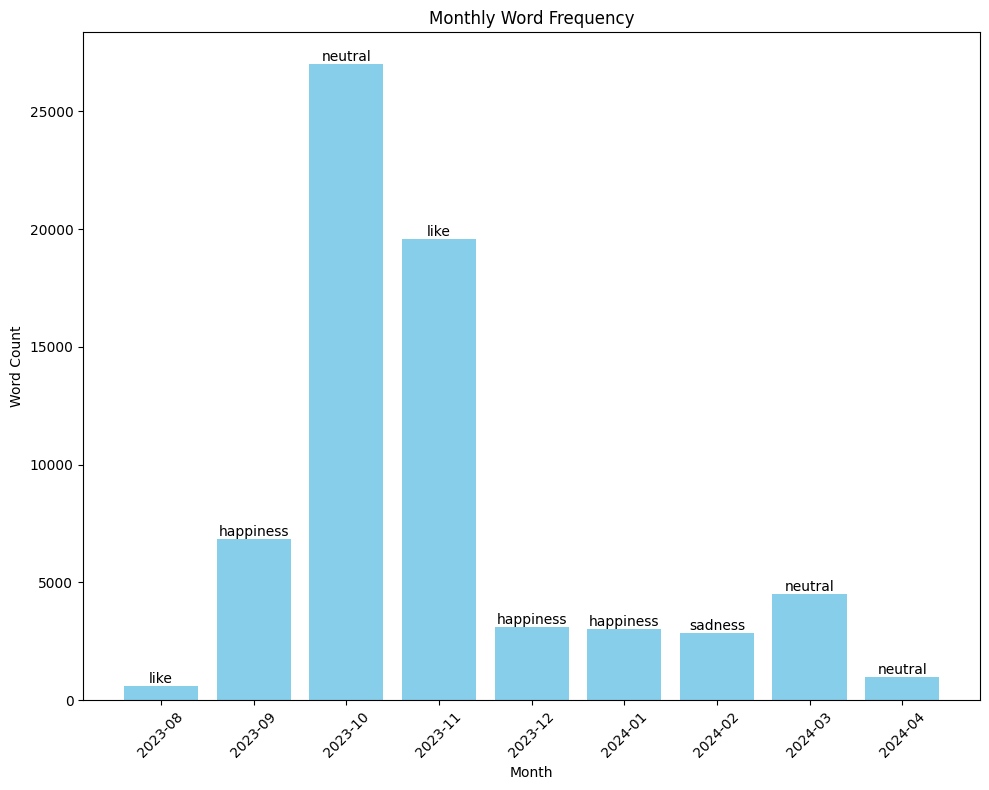

In [37]:


# 生成柱状图
plt.figure(figsize=(10, 8))
bars = plt.bar(monthly_word_count.keys(), word_counts, color='skyblue')
# Add text labels on top of the bars
i = 0
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, month_em[i], ha='center', va='bottom')
    i+=1

plt.xlabel('Month')
plt.ylabel('Word Count')
plt.title('Monthly Word Frequency')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlapping
plt.show()

In [38]:
monthly_emotions

{'2023-08': 'like',
 '2023-09': 'happiness',
 '2023-10': 'neutral',
 '2023-11': 'like',
 '2023-12': 'happiness',
 '2024-01': 'happiness',
 '2024-02': 'sadness',
 '2024-03': 'neutral',
 '2024-04': 'neutral'}

上面的效果表示 情绪有点单一 要不按照上中下旬来变化吧 生成情绪变化图